PCA:

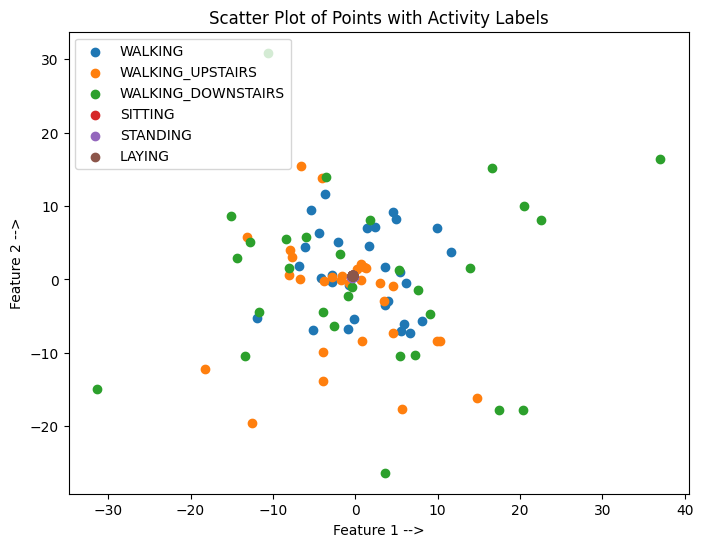

In [21]:
## NOTE THAT THIS NOTEBOOK WAS EXECUTED ON COLLAB
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from tsfel import time_series_features_extractor, get_features_by_domain
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

X_train = np.load('/content/X_train.npy')
y_train = np.load('/content/y_train.npy')
X_test = np.load('/content/X_test.npy')
y_test = np.load('/content/y_test.npy')
X_val = np.load('/content/X_val.npy')
y_val = np.load('/content/y_val.npy')

X_data = []
for i in range(len(X_test)):
    temp = []
    for j in range(len(X_test[0])):
        temp.append(np.dot(X_test[i][j],np.transpose(X_test[i][j])))
    X_data.append(temp)

for i in range(len(X_train)):
    temp = []
    for j in range(len(X_train[0])):
        temp.append(np.dot(X_train[i][j],np.transpose(X_train[i][j])))
    X_data.append(temp)

for i in range(len(X_val)):
    temp = []
    for j in range(len(X_val[0])):
        temp.append(np.dot(X_val[i][j],np.transpose(X_val[i][j])))
    X_data.append(temp)

X_data = np.array(X_data)
y_data = np.array(list(y_test)+list(y_train)+list(y_val))
df = pd.DataFrame(X_data)
# df.columns = [i for i in range(100,600)]
scaling = StandardScaler()
scaling.fit(df)
Scaled_data = scaling.transform(df)
principal = PCA(n_components=2)
principal.fit(Scaled_data)
x = principal.transform(Scaled_data)

plt.figure(figsize=(8, 6))
for i, activity in enumerate(classes):
    indices = y_data == classes[activity]
    plt.scatter(x[indices, 0], x[indices, 1], label=activity)
plt.xlabel('Feature 1 -->')
plt.ylabel('Feature 2 -->')

plt.title('Scatter Plot of Points with Activity Labels')
plt.legend()
plt.show()

TSFEL then PCA:

In [5]:
%pip install tsfel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 635.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.1 MB/s eta 0:00:00


In [6]:
import tsfel

In [22]:
fs = 50
X_train_sig = list(X_train)
X_test_sig = list(X_test)

cfg_file = tsfel.get_features_by_domain()                # All features
# cfg_file = tsfel.get_features_by_domain('statistical') # Only statistical features
# cfg_file = tsfel.get_features_by_domain('temporal')    # Only temporal features
# cfg_file = tsfel.get_features_by_domain('spectral')    # Only spectral features

# Get features
X_train = tsfel.time_series_features_extractor(cfg_file, X_train_sig, fs=fs)
X_test = tsfel.time_series_features_extractor(cfg_file, X_test_sig, fs=fs)

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***


In [23]:
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold

# Highly correlated features are removed
corr_features = tsfel.correlated_features(X_train)
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)

# Remove low variance features
selector = VarianceThreshold()
X_train = selector.fit_transform(X_train)
X_test = selector.transform(X_test)

# Normalising Features
scaler = preprocessing.StandardScaler()
nX_train = scaler.fit_transform(X_train)
nX_test = scaler.transform(X_test)

In [24]:
print(nX_train.shape)

(108, 799)


In [25]:
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score
classifier = tree.DecisionTreeClassifier()
classifier = classifier.fit(nX_train, y_train.ravel())

In [26]:
y_test_predict = classifier.predict(nX_test)

accuracy = accuracy_score(y_test, y_test_predict) * 100
# print(classification_report(y_test, y_test_predict, target_names=activity_labels))
print("Accuracy: " + str(accuracy) + '%')

Accuracy: 91.66666666666666%


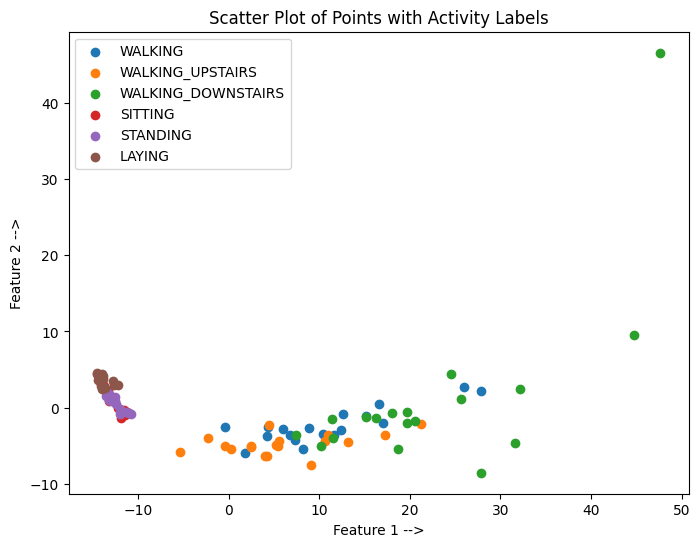

In [28]:
df2 = pd.DataFrame(nX_train)
y_data = np.array(list(y_train))
# df2.columns = [i for i in range(100,600)]
scaling = StandardScaler()
scaling.fit(df2)
Scaled_data = scaling.transform(df2)
principal = PCA(n_components=2)
principal.fit(Scaled_data)
x = principal.transform(Scaled_data)

plt.figure(figsize=(8, 6))
for i, activity in enumerate(classes):
    indices = y_data == classes[activity]
    plt.scatter(x[indices, 0], x[indices, 1], label=activity)
plt.xlabel('Feature 1 -->')
plt.ylabel('Feature 2 -->')

plt.title('Scatter Plot of Points with Activity Labels')
plt.legend()
plt.show()

We can see in the two scatter plots that in the plot obtained after only applying PCA, we are not able to clearly distinguish the different activities. On the other hand, when we performed TSFEL and then applied PCA, in the plot obtained in this case, we can see that the different activities could be very nicely distinguihed. Thus the two features obtained here by applying both TSFEL and PCA would be more useful while performing classification task when compared to the two features obtained by the application of only PCA.